In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.columns = data.columns.str.strip()

In [4]:
data['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [5]:
numeric = data.select_dtypes(include = 'number')
numeric = numeric.drop('loan_id', axis = 1)

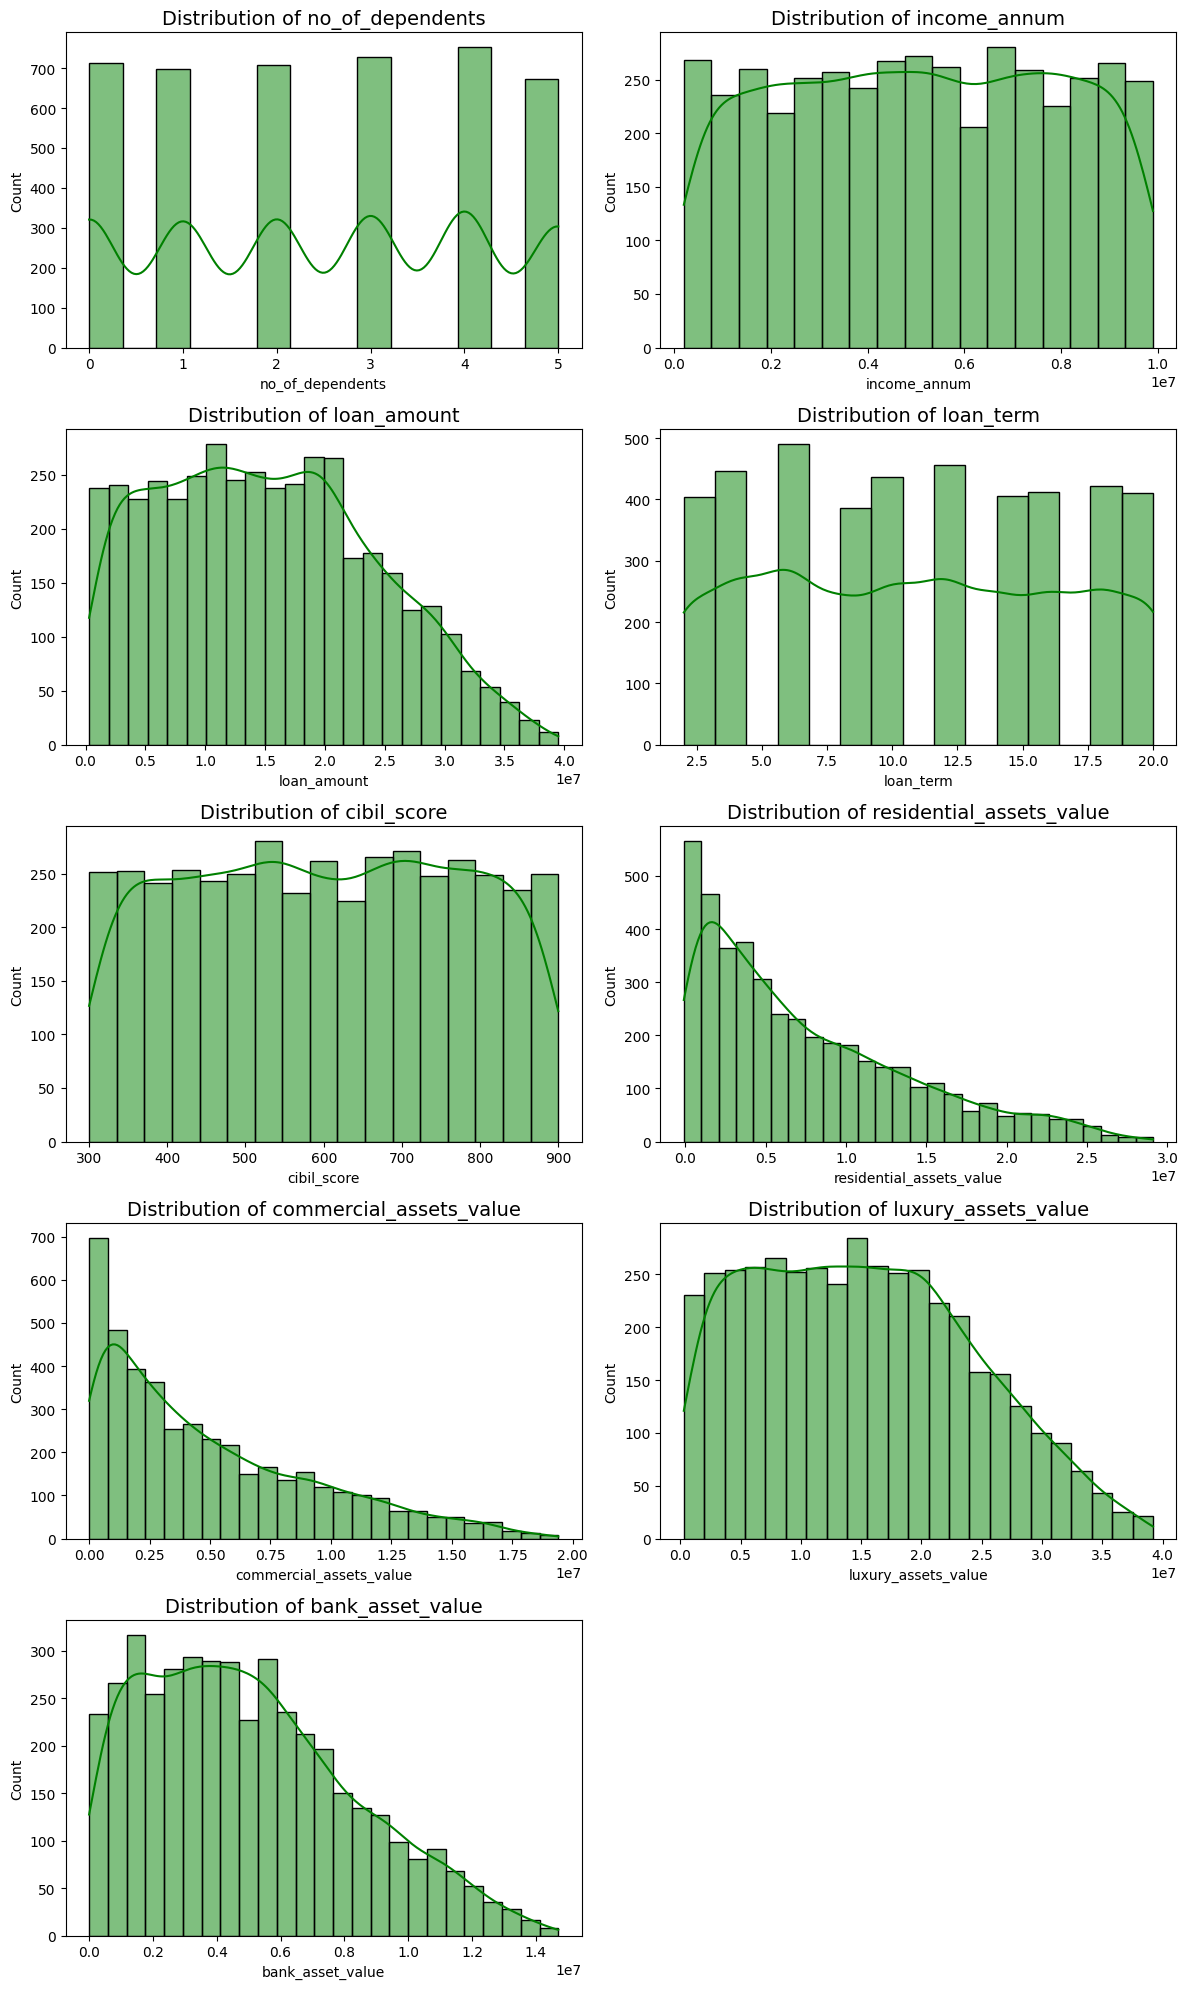

In [6]:

numeric_cols = data.select_dtypes(include='number').drop('loan_id', axis=1, errors='ignore')
n = len(numeric_cols.columns)

fig, axes = plt.subplots(math.ceil(n / 2), 2, figsize=(12, 4 * math.ceil(n / 2)))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols.columns):
    sns.histplot(data=numeric_cols, x=col, color='green', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14)


for ax in axes[n:]:
    ax.remove()

plt.tight_layout()
plt.show()


In [7]:
skewness_score = numeric_cols.skew().sort_values(ascending = True
                                               )
def categories(value):
    if abs(value) < 0.5:
        return 'Low Skew'
    elif abs(value) < 1:
        return 'Moderate Skew'
    else:
        return 'High Skew'

skew_info = pd.DataFrame({
    'Score': skewness_score,
    'Type_Skew': skewness_score.apply(categories)
})

print(skew_info)

    

                             Score      Type_Skew
no_of_dependents         -0.017971       Low Skew
income_annum             -0.012814       Low Skew
cibil_score              -0.009039       Low Skew
loan_term                 0.036359       Low Skew
loan_amount               0.308724       Low Skew
luxury_assets_value       0.322208       Low Skew
bank_asset_value          0.560725  Moderate Skew
commercial_assets_value   0.957791  Moderate Skew
residential_assets_value  0.978451  Moderate Skew


## Features Engineering

In [8]:
data['loan_term_group'] = pd.cut(data['loan_term'] , bins = [0,6,12,np.inf],labels=['Short', 'Medium', 'Long']) 

In [9]:
log_col = ['commercial_assets_value','residential_assets_value']

for col in log_col:
    data[col] = np.log1p(data[col])

c:\Users\seyhak jr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
loan_status = {
    ' Approved' : 0,
    ' Rejected': 1
}
data['loan_status'] = data['loan_status'].map(loan_status)

In [11]:
employed = {
    ' Yes' : 0,
    ' No': 1
}
data['self_employed'] = data['self_employed'].map(employed)

In [12]:
educated= {
    ' Graduate' : 0,
    ' Not Graduate': 1
}

data['education'] = data['education'].map(educated)

In [13]:
data.dropna(inplace = True)

In [14]:
data['loan_term'].unique()

array([12,  8, 20, 10,  4,  2, 18, 16, 14,  6], dtype=int64)

In [15]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_term_group
0,1,2,0,1,9600000,29900000,12,778,14.690980,16.683410,22700000,8000000,0,Medium
1,2,0,1,0,4100000,12200000,8,417,14.808763,14.603968,8800000,3300000,1,Medium
2,3,3,0,1,9100000,29700000,20,506,15.775605,15.319588,33300000,12800000,1,Long
3,4,3,0,1,8200000,30700000,8,467,16.716932,15.009433,23300000,7900000,1,Medium
4,5,5,1,0,9800000,24200000,20,382,16.333207,15.919645,29400000,5000000,1,Long


In [16]:
data.drop('loan_term_group' , axis = 1 , inplace = True)

In [17]:
def loan_term_group(x):
    if x <= 6:
        return 'short'
    elif x <= 12 :
        return 'meduim'
    else:
        return 'long'

data['loan_term_group'] = data['loan_term'].apply(loan_term_group)


In [18]:
def dependent(y):
    if y == 0 :
        return 'none'
    if y <= 2 :
        return 'low'
    if y <= 4 :
        return 'meduim'
    else :
        return 'high'

data['no_of_dependents'] = data['no_of_dependents'].apply(dependent)

In [19]:
# data = pd.get_dummies( data , columns = ['loan_term_group', 'no_of_dependents'] , drop_first = True)
data = pd.get_dummies(data, columns=['loan_term_group', 'no_of_dependents'], drop_first=True, dtype=int)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241 entries, 0 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4241 non-null   int64  
 1   education                 4241 non-null   int64  
 2   self_employed             4241 non-null   int64  
 3   income_annum              4241 non-null   int64  
 4   loan_amount               4241 non-null   int64  
 5   loan_term                 4241 non-null   int64  
 6   cibil_score               4241 non-null   int64  
 7   residential_assets_value  4241 non-null   float64
 8   commercial_assets_value   4241 non-null   float64
 9   luxury_assets_value       4241 non-null   int64  
 10  bank_asset_value          4241 non-null   int64  
 11  loan_status               4241 non-null   int64  
 12  loan_term_group_meduim    4241 non-null   int32  
 13  loan_term_group_short     4241 non-null   int32  
 14  no_of_depende

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , roc_auc_score , accuracy_score
from sklearn.model_selection import GridSearchCV

In [22]:
data.drop(['loan_id','loan_term'] , axis = 1 , inplace = True)

In [23]:
X = data.drop('loan_status' , axis = 1)
y = data['loan_status']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 23)

## Machine Learning Model

## LogisticRegression

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [26]:
lg = LogisticRegression(
    C = 0.1 ,
    class_weight = 'balanced',
    penalty = 'l1',
    solver = 'liblinear'
)
lg.fit(X_train , y_train)


c:\Users\seyhak jr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [27]:
lg_pred = lg.predict(X_test)
lg_proba = lg.predict_proba(X_test)[:,1]

In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, lg_pred))
print("\nClassification Report:\n", classification_report(y_test, lg_pred))
print("Accuracy:", accuracy_score(y_test, lg_pred))
print("ROC AUC:", roc_auc_score(y_test, lg_proba))

Confusion Matrix:
 [[496  39]
 [ 16 298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       535
           1       0.88      0.95      0.92       314

    accuracy                           0.94       849
   macro avg       0.93      0.94      0.93       849
weighted avg       0.94      0.94      0.94       849

Accuracy: 0.9352179034157833
ROC AUC: 0.9707423060896481


## DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,               
    scoring='accuracy',  
    n_jobs=-1,         
    verbose=1           
)

grid_search.fit(X_train, y_train)
print("\nGrid search completed!")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_:.4f}")
best_dtree = grid_search.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Grid search completed!
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy Score: 0.9587


In [30]:
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,          
    min_samples_leaf=2,    
    min_samples_split=2,
    random_state=42        
)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)

In [31]:

dtreepred = dtree.predict(X_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       535
           1       0.92      0.97      0.95       314

    accuracy                           0.96       849
   macro avg       0.95      0.96      0.96       849
weighted avg       0.96      0.96      0.96       849

Accuracy of Decision Tree is :  95.99528857479388


## RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
param_grid = { 
    'n_estimators': [100,200],
    'max_depth': [5,10, None],
    'min_samples_split': [2,5],
    'max_features': ['sqrt','log2']
}


grid = GridSearchCV(RandomForestClassifier() ,param_grid, cv = 5 )
grid.fit(X_train, y_train)
print("\nGrid search completed!")
print(f"Best Parameters: {grid.best_params_}")



Grid search completed!
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [34]:
rf = RandomForestClassifier(
    max_depth =  None,
    max_features=  'sqrt',
    min_samples_split =  2,
    n_estimators =  200
)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test,rf_pred))
print('Accuracy of predicted model is :', accuracy_score(y_test,rf_pred)*100)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       535
           1       0.94      0.97      0.95       314

    accuracy                           0.96       849
   macro avg       0.96      0.97      0.96       849
weighted avg       0.97      0.96      0.96       849

Accuracy of predicted model is : 96.46643109540636


## XGBClassifier

In [36]:
from xgboost import XGBClassifier

In [37]:
# param_grid = {
#     'learning_rate': [0.02, 0.1, 0.2],      
#     'max_depth': [3, 6, 9],                  
#     'min_child_weight': [1, 3, 5],           
#     'subsample': [0.7, 0.8, 1.0],            
#     'colsample_bytree': [0.7, 0.8, 1.0],    
#     'n_estimators': [100, 200, 300],         
#     'gamma': [0, 0.1, 0.2],                  
#     'reg_alpha': [0, 0.1],                   
#     'reg_lambda': [1, 0.1]                   
# }

# xg_grid = GridSearchCV(XGBClassifier(),param_grid , cv = 5 )
# xg_grid.fit(X_train ,y_train)

# print("\n GridSearch Completed")
# print(f'Best Parameter : {xg_grid.best_params_}')

In [38]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
xg_pred = xg.predict(X_test)

In [40]:
print(classification_report(y_test , xg_pred))
print('The predicted score :', accuracy_score(y_test , xg_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       535
           1       0.93      0.96      0.95       314

    accuracy                           0.96       849
   macro avg       0.95      0.96      0.96       849
weighted avg       0.96      0.96      0.96       849

The predicted score : 0.9587750294464076


## Predict Testing with New DataFrame

In [41]:
test = pd.DataFrame({
    'education': [0],                      
    'self_employed': [1],                 
    'income_annum': [3000],             
    'loan_amount': [5000000],              
    'cibil_score': [700],                 
    'residential_assets_value': np.log1p([10000]), 
    'commercial_assets_value': [0],   
    'luxury_assets_value': [1500],      
    'bank_asset_value': [200],         
    'loan_term_group_meduim': [0],       
    'loan_term_group_short': [1],         
    'no_of_dependents_low': [1],         
    'no_of_dependents_meduim': [0],       
    'no_of_dependents_none': [0]
})

In [42]:
xg_pred = xg.predict(test)
rf_pred = rf.predict(test)
dtreepred = dtree.predict(test)
lg_pred = lg.predict(test)


In [43]:
pred_df = pd.DataFrame({
    'Logistic Regression': lg_pred,
    'Decision Tree': dtreepred,
    'Random Forest': rf_pred,
    'XGBoost': xg_pred
})



In [44]:
pred_df = pred_df.replace({0: 'Approved', 1: 'Rejected'})

print(pred_df)

  Logistic Regression Decision Tree Random Forest   XGBoost
0            Approved      Rejected      Approved  Rejected


# After testing predictions with new input data multiple times, I conclude that:

# XGBoost is the best-performing model, followed closely by the Decision Tree model.
# These models have proven to be very effective for predicting whether a person is eligible for a loan (Approved = 0, Rejected = 1).

In [45]:
import joblib

joblib.dump(dtree, 'dtree_model.pkl')


['dtree_model.pkl']

In [46]:
model = joblib.load('dtree_model.pkl')
